# Agriculture Dataset

These two datasets focus on the theme of agriculture, which consists of important features like location, price, crop name, year it was grown in, etc.

# What data depicts?

This database contains statistics on four feed grains (corn, grain sorghum, barley, and oats), foreign coarse grains (feed grains plus rye, millet, and mixed grains), hay, animal unit indexes of grain and roughage, rail rate indexes, and grain shipments. This includes data published in the monthly Feed Outlook and the annual Feed Yearbook reports. Here i will consider only four feed grains as proposed in the proposal.

# Contents of the Notebook:

1) Analysis of the features.

2) Finding any relations or trends considering multiple features.

3) Removing NaN values where needed.

4) Answering the question asked from data 

5) Prove the Hypothesis

# Proposal

Source for 1st csv (feedgrains): https://data.world/cdc2019/agriculture/workspace/file?filename=FeedGrains.csv
Source for 2nd csv (projection): https://data.world/cdc2019/agriculture/workspace/file?filename=Projection2019.csv

Discovery of the data: I was always curious how much crops of different kind are created every year so i searching for agriculture related dataset on data.world website and settled with this dataset as it depicts the cost of four feed grains (corn, grain sorghum, barley, and oats), foreign coarse grains (feed grains plus rye, millet, and mixed grains), hay, and related items.

Size: csv1: 679.4 MB
      csv2: 223.4 KB

FeedGrain.csv depicts information of the above listed crops over the years from 1948 to 2018 for each crop and shows its pricing yearly and monthly.

Projection.csv shows the value of each type from the year 2017 to 2029, this is called projection because this is just an assumption that production will increase over the years as it has increased since 1949.

Question asked of the dataset: how the prices of crops in the feedgrain dataset like: barley, oats, corns and sorghum varies anually over the years and also in the projection dataset how values of crops corresponding to the feedgrain dataset varies from 2017 to 2029 and check for the hike in prices over the years and also for the coming.

Hypothesis 1: Money generated from exporting the crops are more than importing the crops of each type.

Hypothesis 2: Value will increase from 2018 to 2029 of each crop which is listed in projection.csv. This hypothesis is based on assumption that production and demand of the crop increases each following year.

# Question

how the prices of crops in the feedgrain dataset like: barley, oats, corns and sorghum varies anually over the years and also in the projection dataset how values of crops corresponding to the feedgrain dataset varies from 2017 to 2029 and check for the hike in prices over the years and also for the coming .

Answer: 1) Value of Corn constantly increases but in other crops the values increase till early 90s then drops.

2) corn and barley increases from 2017 to 2029, whereas sorghum and oats show neither hike nor decline in values.

# Hypothesis

1) Hypothesis 1: Money generated from exporting the crops are more than importing the crops of each type. (True)

2) Hypothesis 2: Value will increase from 2017 to 2029 of each crop which is listed in projection.csv. This hypothesis is based on assumption that production and demand of the crop increases each following year. (Partially true as only values of corn and barley increases and other remain constant.)

# Knowledge gained

1) United states produce so much crops per year that it can supply enough crops to it's states as well as to other countries too.

2) United states will be producing crops constantly in the coming year with no decrease in their production.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df_feed=pd.read_csv('/home/shouray/ml1/601 week 12/FeedGrains.csv')

In [3]:
df_feed

,SC_Group_ID,SC_Group_Desc,SC_GroupCommod_ID,SC_GroupCommod_Desc,SC_Geography_ID,SortOrder,SC_GeographyIndented_Desc,SC_Commodity_ID,SC_Commodity_Desc,SC_Attribute_ID,SC_Attribute_Desc,SC_Unit_ID,SC_Unit_Desc,Year_ID,SC_Frequency_ID,SC_Frequency_Desc,Timeperiod_ID,Timeperiod_Desc,Amount
0,1,Prices,17.0,Oats,1,0.8,United States,3,Oats,5,Prices received by farmers,4,Dollars per bushel,1948,1,Monthly,8,Aug,0.690000
1,1,Prices,17.0,Oats,1,0.8,United States,3,Oats,5,Prices received by farmers,4,Dollars per bushel,1948,1,Monthly,9,Sep,0.690000
2,1,Prices,17.0,Oats,1,0.8,United States,3,Oats,5,Prices received by farmers,4,Dollars per bushel,1948,1,Monthly,10,Oct,0.700000
3,1,Prices,17.0,Oats,1,0.8,United States,3,Oats,5,Prices received by farmers,4,Dollars per bushel,1948,1,Monthly,11,Nov,0.760000
4,1,Prices,17.0,Oats,1,0.8,United States,3,Oats,5,Prices received by farmers,4,Dollars per bushel,1948,1,Monthly,12,Dec,0.760000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463113,3,Exports and imports,12.0,Corn,204,187.0,China (Taiwan),2,Corn,19,"Imports, to U.S. from specified source",7,"1,000 metric tons",2019,1,Monthly,7,Jul,0.631104
463114,2,Supply and use,12.0,Corn,204,187.0,China (Taiwan),2,Corn,35,"Exports, trade year",7,"1,000 metric tons",1991,3,Annual,114,MY Oct-Sep,10.000000
463115,2,Supply and use,12.0,Corn,204,187.0,China (Taiwan),2,Corn,35,"Exports, trade year",7,"1,000 metric tons",1992,3,Annual,114,MY Oct-Sep,17.000000
463116,3,Exports and imports,12.0,Corn,204,187.0,China (Taiwan),11,Corn grain,19,"Imports, to U.S. from specified source",7,"1,000 metric tons",2018,3,Annual,31,MY Sep-Aug,0.000306


##### selecting only the columns those are relevant and provide some information.

In [4]:
df_feed=pd.DataFrame(df_feed, columns=['SC_Group_Desc', 'SC_Commodity_Desc', 'SC_Attribute_Desc', 
                                             'SC_Unit_Desc', 'Year_ID','SC_Frequency_Desc',
                                             'Timeperiod_Desc', 'Amount', 'SC_GeographyIndented_Desc'])

##### reading the projection csv which shows future data of the crops including present and last year.

In [5]:
df_projection=pd.read_csv('/home/shouray/ml1/601 week 12/Projection2019.csv', index_col='YearType')

In [6]:
df_projection

,Attribute,Commodity,CommodityType,Units,Year,Value
YearType,,,,,,
Market year,Beginning stocks,Barley,Crops,Million bushels,2017/18,106.0
Market year,Beginning stocks,Barley,Crops,Million bushels,2018/19,94.0
Market year,Beginning stocks,Barley,Crops,Million bushels,2019/20,88.0
Market year,Beginning stocks,Barley,Crops,Million bushels,2020/21,87.0
Market year,Beginning stocks,Barley,Crops,Million bushels,2021/22,83.0
...,...,...,...,...,...,...
Market year,Yield/harvested acre,Wheat,Crops,Bushels per acre,2024/25,49.8
Market year,Yield/harvested acre,Wheat,Crops,Bushels per acre,2025/26,50.2
Market year,Yield/harvested acre,Wheat,Crops,Bushels per acre,2026/27,50.6


##### Commodities present in the projection dataframe

In [7]:
df_projection['Commodity'].value_counts()

Corn                                          240
Wheat                                         240
Soybeans                                      228
Oats                                          228
Sorghum                                       228
Barley                                        228
Rice                                          216
Upland Cotton                                 204
Beef                                          192
Pork                                          144
Egg                                           132
Soybean oil                                   132
Soybean meal                                  120
Per capita meat consumption, retail weight    120
Chicken                                       108
Turkey                                         96
Dairy                                          72
Name: Commodity, dtype: int64

I renamed Market Year to Commodity market year for simplicity of understanding two datasets as both specify the same information.

In [8]:
df_projection=df_projection.rename(index={'Market year':'Commodity Market Year'})

In [9]:
df_projection=df_projection.rename_axis('YearType').reset_index()

Therefore, to select only above mentioned crops I set the index as 'Commodity' and selected the required crops

In [10]:
df_projection.set_index('Commodity', inplace=True)

In [11]:
df_projection=df_projection.loc[['Corn', 'Barley', 'Sorghum', 'Oats']]

In [12]:
df_projection=df_projection.rename_axis('Commodity').reset_index()

In [13]:
df_projection

,Commodity,YearType,Attribute,CommodityType,Units,Year,Value
0,Corn,Commodity Market Year,Beginning stocks,Crops,Million bushels,2017/18,2293.0
1,Corn,Commodity Market Year,Beginning stocks,Crops,Million bushels,2018/19,2140.0
2,Corn,Commodity Market Year,Beginning stocks,Crops,Million bushels,2019/20,1813.0
3,Corn,Commodity Market Year,Beginning stocks,Crops,Million bushels,2020/21,1603.0
4,Corn,Commodity Market Year,Beginning stocks,Crops,Million bushels,2021/22,1618.0
...,...,...,...,...,...,...,...
919,Oats,Commodity Market Year,Yield/harvested acre,Crops,Bushels per acre,2024/25,68.0
920,Oats,Commodity Market Year,Yield/harvested acre,Crops,Bushels per acre,2025/26,68.4
921,Oats,Commodity Market Year,Yield/harvested acre,Crops,Bushels per acre,2026/27,68.7
922,Oats,Commodity Market Year,Yield/harvested acre,Crops,Bushels per acre,2027/28,69.0


##### Comparing the columns of both the datasets.

In [14]:
df_feed.columns

Index(['SC_Group_Desc', 'SC_Commodity_Desc', 'SC_Attribute_Desc',
       'SC_Unit_Desc', 'Year_ID', 'SC_Frequency_Desc', 'Timeperiod_Desc',
       'Amount', 'SC_GeographyIndented_Desc'],
      dtype='object')

In [15]:
df_projection.columns

Index(['Commodity', 'YearType', 'Attribute', 'CommodityType', 'Units', 'Year',
       'Value'],
      dtype='object')

##### Two datasets have relatable values under columns but they are two different datasets so column names are different, to counter that we need to change the column names.

##### In order to combine the data we need to change column names of one of the table and match it with other.

'Amount' in feedgrain dataset becames 'Value, as, in feedgrain dataframe cost is depicted by amount column and in projection dataframe under Value column.

In [16]:
df_feed=df_feed.rename(columns={'SC_Commodity_Desc':'Commodity', 'SC_Attribute_Desc':'Attribute', 'SC_Unit_Desc':'Units', 
                       'Year_ID':'Year', 'SC_Frequency_Desc':'Frequency', 'Timeperiod_Desc':'YearType', 'Amount':'Value'})

#### only taking the annual data as we are considering only 'commodity market year' and hypothesis is also based on annual change.

In [17]:
df_feed=df_feed[df_feed['Frequency']=='Annual']

##### taking only 4 kind of crops barley, corn, oats and sorghum

In [18]:
df_feed=df_feed.set_index('Commodity')

##### After setting up the index we will choose 4 kind of crops from it.

In [19]:
df_feed=df_feed.loc[['Corn', 'Barley', 'Sorghum', 'Oats']]

##### Putting the column in place that was made the index

In [20]:
df_feed=df_feed.rename_axis('Commodity').reset_index()

##### Now we need to consider United State as the location as in projection dataset only information of United States is present and considering other countries would not help with the comparison.

In [21]:
df_feed=df_feed[df_feed['SC_GeographyIndented_Desc']=='United States']

In [22]:
df_feed

,Commodity,SC_Group_Desc,Attribute,Units,Year,Frequency,YearType,Value,SC_GeographyIndented_Desc
0,Corn,Prices,Prices received by farmers,Dollars per bushel,1866,Annual,Commodity Market Year,0.657,United States
1,Corn,Prices,Prices received by farmers,Dollars per bushel,1867,Annual,Commodity Market Year,0.781,United States
2,Corn,Prices,Prices received by farmers,Dollars per bushel,1868,Annual,Commodity Market Year,0.617,United States
3,Corn,Prices,Prices received by farmers,Dollars per bushel,1869,Annual,Commodity Market Year,0.725,United States
4,Corn,Prices,Prices received by farmers,Dollars per bushel,1870,Annual,Commodity Market Year,0.521,United States
...,...,...,...,...,...,...,...,...,...
36660,Oats,Prices,Prices received by farmers,Dollars per bushel,1946,Annual,Commodity Market Year,0.805,United States
36661,Oats,Prices,Prices received by farmers,Dollars per bushel,1947,Annual,Commodity Market Year,1.040,United States
37008,Oats,Supply and use,Harvested acreage,Million acres,2017,Annual,Commodity Market Year,0.804,United States
37009,Oats,Supply and use,Harvested acreage,Million acres,2018,Annual,Commodity Market Year,0.865,United States


#### For annual visualization of the crops I saved each crop seperately into new dataframe because due to large difference between the values, the visualization was not clear.

In [23]:
df_corn=df_feed[df_feed['Commodity']=='Corn']

In [24]:
df_corn

,Commodity,SC_Group_Desc,Attribute,Units,Year,Frequency,YearType,Value,SC_GeographyIndented_Desc
0,Corn,Prices,Prices received by farmers,Dollars per bushel,1866,Annual,Commodity Market Year,0.657,United States
1,Corn,Prices,Prices received by farmers,Dollars per bushel,1867,Annual,Commodity Market Year,0.781,United States
2,Corn,Prices,Prices received by farmers,Dollars per bushel,1868,Annual,Commodity Market Year,0.617,United States
3,Corn,Prices,Prices received by farmers,Dollars per bushel,1869,Annual,Commodity Market Year,0.725,United States
4,Corn,Prices,Prices received by farmers,Dollars per bushel,1870,Annual,Commodity Market Year,0.521,United States
...,...,...,...,...,...,...,...,...,...
12476,Corn,Supply and use,Commercial stocks,Million bushels,2015,Annual,MY Sep-Aug,1737.058,United States
12477,Corn,Supply and use,Commercial stocks,Million bushels,2016,Annual,MY Sep-Aug,2293.303,United States
12478,Corn,Supply and use,Commercial stocks,Million bushels,2017,Annual,MY Sep-Aug,2140.335,United States
12479,Corn,Supply and use,Commercial stocks,Million bushels,2018,Annual,MY Sep-Aug,2095.436,United States


In [25]:
df_sor=df_feed[df_feed['Commodity']=='Sorghum']

In [26]:
df_oats=df_feed[df_feed['Commodity']=='Oats']

In [27]:
df_b=df_feed[df_feed['Commodity']=='Barley']

graph to show that single graph is not enough to answer my question.

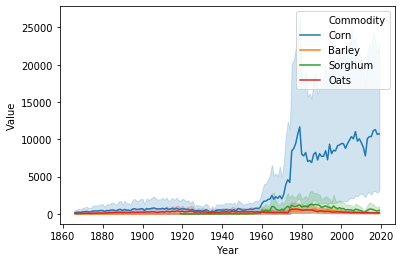

In [28]:
this_plot=sns.lineplot(df_feed['Year'], df_feed['Value'], hue=df_feed['Commodity'], n_boot=1000)

There are alot of values near to zero and few near to big numbers as there are many different data in attribute column like: prices received by farmers, export, import, etc, therefore they have different range some of them lie in low range whereas, other have high range values.

In [29]:
df_corn['Attribute'].value_counts()

Prices received by farmers                     154
Yield per harvested acre                       154
Production                                     154
Harvested acreage                              154
Commercial stocks                               94
Planted acreage                                 94
Feed and residual use                           90
Exports, trade year                             60
Imports, trade year                             60
Total disappearance                             45
Ending stocks                                   45
Seed use                                        45
Imports, market year                            45
Food, alcohol, and industrial use               45
Total domestic use                              45
Total supply                                    45
Exports, market year                            45
Beginning stocks                                45
CCC-owned inventory (stocks)                    44
Glucose and dextrose use       

##### jointplot shows scatter plot and also visualize the scattered data through bar plot, each axis has a bar plot over it, which shows the density of scttered data.

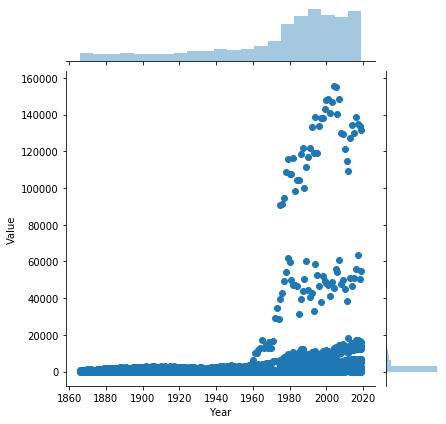

In [30]:
sns.jointplot('Year', 'Value', data=df_corn)

In [31]:
df_corn[(df_corn['Year']==2019)].describe()

,Year,Value
count,26.0,26.000000
mean,2019.0,10744.314319
std,0.0,27038.649195
min,2019.0,3.600000
25%,2019.0,179.685550
50%,2019.0,2119.793500
75%,2019.0,6871.750000
max,2019.0,131451.105904


In [32]:
np.var(df_corn[(df_corn['Year']==2019)])

Year     0.000000e+00
Value    7.029698e+08
dtype: float64

### Question asked from the dataset:
####  how the prices of crops in the feedgrain dataset like: barley, oats, corns and sorghum varies anually over the years.

##### Rise in the values of crops over the years using seaborn barplot

/home/shouray/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


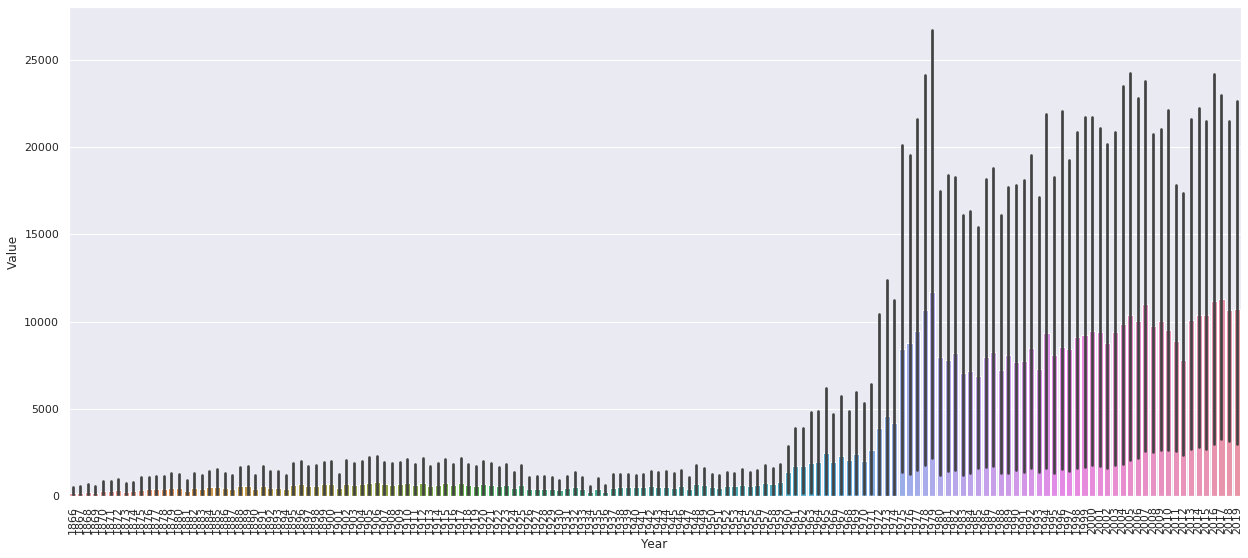

In [33]:
import seaborn as sns
sns.set(rc={'figure.figsize':(21,9)})
df_corn['Year']=df_corn['Year'].astype(int)
this_plot=sns.barplot(df_corn['Year'], df_corn['Value'], n_boot=1000)
this_plot.set_xticklabels(this_plot.get_xticklabels(), rotation=90)
sns.set(rc={'figure.figsize':(11.7,8.27)})
#sns.plt.xlim(1850, 2050)


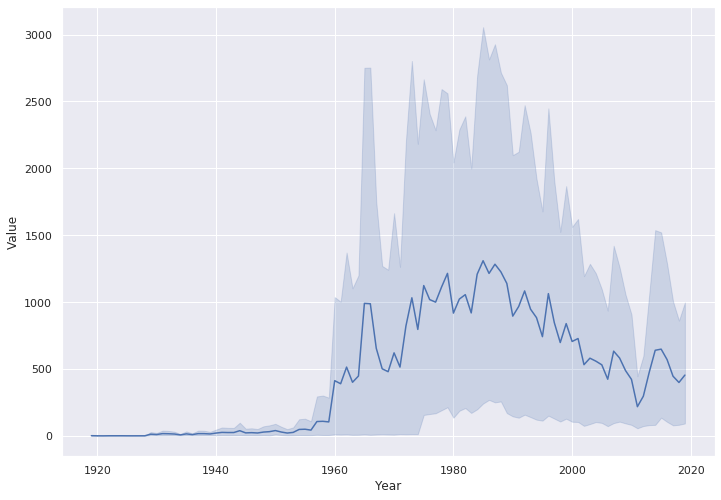

In [34]:
this_plot=sns.lineplot(df_sor['Year'], df_sor['Value'], n_boot=1000)

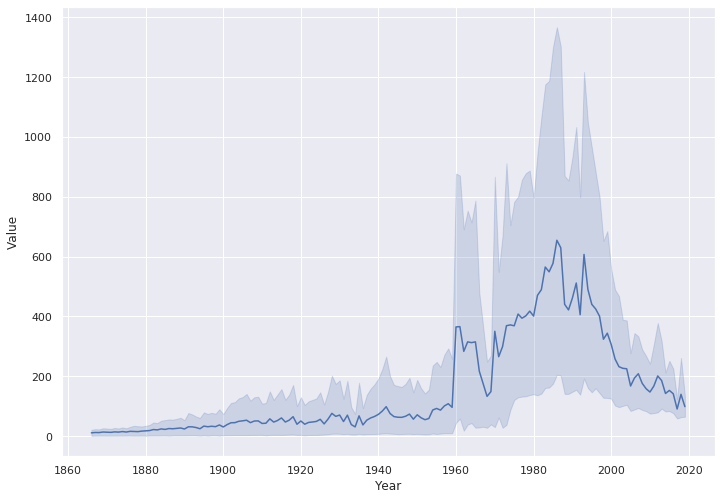

In [35]:
this_plot=sns.lineplot(df_b['Year'], df_b['Value'], n_boot=1000)

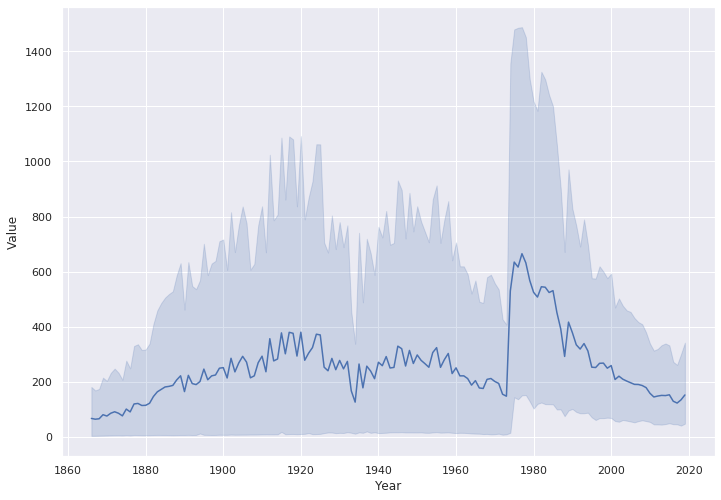

In [36]:
this_plot=sns.lineplot(df_oats['Year'], df_oats['Value'], n_boot=1000)

##### These visualization answers the question as we can see that in corn data the value constantly increases but in other crops the values increase till early 90s then drops.

#### Concatenate the dataframes so that we can jump on to the Hypothesis.

In [37]:
df=pd.concat([df_feed, df_projection])

/home/shouray/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [38]:
df

,Attribute,Commodity,CommodityType,Frequency,SC_GeographyIndented_Desc,SC_Group_Desc,Units,Value,Year,YearType
0,Prices received by farmers,Corn,NaN,Annual,United States,Prices,Dollars per bushel,0.657,1866,Commodity Market Year
1,Prices received by farmers,Corn,NaN,Annual,United States,Prices,Dollars per bushel,0.781,1867,Commodity Market Year
2,Prices received by farmers,Corn,NaN,Annual,United States,Prices,Dollars per bushel,0.617,1868,Commodity Market Year
3,Prices received by farmers,Corn,NaN,Annual,United States,Prices,Dollars per bushel,0.725,1869,Commodity Market Year
4,Prices received by farmers,Corn,NaN,Annual,United States,Prices,Dollars per bushel,0.521,1870,Commodity Market Year
...,...,...,...,...,...,...,...,...,...,...
919,Yield/harvested acre,Oats,Crops,NaN,NaN,NaN,Bushels per acre,68.000,2024/25,Commodity Market Year
920,Yield/harvested acre,Oats,Crops,NaN,NaN,NaN,Bushels per acre,68.400,2025/26,Commodity Market Year
921,Yield/harvested acre,Oats,Crops,NaN,NaN,NaN,Bushels per acre,68.700,2026/27,Commodity Market Year
922,Yield/harvested acre,Oats,Crops,NaN,NaN,NaN,Bushels per acre,69.000,2027/28,Commodity Market Year


### Drop Columns

##### 1. Commodity Type: only tells that the data that we are using is crop, however we can figure that if we come across the data. Therefore, applying human analytics we can delete this row.
##### 2. Frequency: Only present in df_feed dataset and depicts that crops prices are measured annually, however, that is understandable if we look at the YearType column which has 'Commodity Market Year' as row data which clearly speaks that crops are measured annually.

In [39]:
df=df.drop(columns=(['Frequency', 'CommodityType']))

In [40]:
df

,Attribute,Commodity,SC_GeographyIndented_Desc,SC_Group_Desc,Units,Value,Year,YearType
0,Prices received by farmers,Corn,United States,Prices,Dollars per bushel,0.657,1866,Commodity Market Year
1,Prices received by farmers,Corn,United States,Prices,Dollars per bushel,0.781,1867,Commodity Market Year
2,Prices received by farmers,Corn,United States,Prices,Dollars per bushel,0.617,1868,Commodity Market Year
3,Prices received by farmers,Corn,United States,Prices,Dollars per bushel,0.725,1869,Commodity Market Year
4,Prices received by farmers,Corn,United States,Prices,Dollars per bushel,0.521,1870,Commodity Market Year
...,...,...,...,...,...,...,...,...
919,Yield/harvested acre,Oats,NaN,NaN,Bushels per acre,68.000,2024/25,Commodity Market Year
920,Yield/harvested acre,Oats,NaN,NaN,Bushels per acre,68.400,2025/26,Commodity Market Year
921,Yield/harvested acre,Oats,NaN,NaN,Bushels per acre,68.700,2026/27,Commodity Market Year
922,Yield/harvested acre,Oats,NaN,NaN,Bushels per acre,69.000,2027/28,Commodity Market Year


In [41]:
df[df['Units']=='Bushels per acre']

,Attribute,Commodity,SC_GeographyIndented_Desc,SC_Group_Desc,Units,Value,Year,YearType
191,Yield per harvested acre,Corn,United States,Supply and use,Bushels per acre,24.3,1866,Commodity Market Year
192,Yield per harvested acre,Corn,United States,Supply and use,Bushels per acre,24.7,1867,Commodity Market Year
193,Yield per harvested acre,Corn,United States,Supply and use,Bushels per acre,26.2,1868,Commodity Market Year
194,Yield per harvested acre,Corn,United States,Supply and use,Bushels per acre,21.8,1869,Commodity Market Year
195,Yield per harvested acre,Corn,United States,Supply and use,Bushels per acre,29.3,1870,Commodity Market Year
...,...,...,...,...,...,...,...,...
919,Yield/harvested acre,Oats,NaN,NaN,Bushels per acre,68.0,2024/25,Commodity Market Year
920,Yield/harvested acre,Oats,NaN,NaN,Bushels per acre,68.4,2025/26,Commodity Market Year
921,Yield/harvested acre,Oats,NaN,NaN,Bushels per acre,68.7,2026/27,Commodity Market Year
922,Yield/harvested acre,Oats,NaN,NaN,Bushels per acre,69.0,2027/28,Commodity Market Year


##### as we can see data under SC_Group_Desc which is 'Bushels per acre' has a corresponding Units value of 'Supply and use', therefore, we can probably fill in the nan values with 'Supply and use'

In [42]:
df['SC_Group_Desc'].fillna('Supply and use', inplace=True)

In [43]:
df

,Attribute,Commodity,SC_GeographyIndented_Desc,SC_Group_Desc,Units,Value,Year,YearType
0,Prices received by farmers,Corn,United States,Prices,Dollars per bushel,0.657,1866,Commodity Market Year
1,Prices received by farmers,Corn,United States,Prices,Dollars per bushel,0.781,1867,Commodity Market Year
2,Prices received by farmers,Corn,United States,Prices,Dollars per bushel,0.617,1868,Commodity Market Year
3,Prices received by farmers,Corn,United States,Prices,Dollars per bushel,0.725,1869,Commodity Market Year
4,Prices received by farmers,Corn,United States,Prices,Dollars per bushel,0.521,1870,Commodity Market Year
...,...,...,...,...,...,...,...,...
919,Yield/harvested acre,Oats,NaN,Supply and use,Bushels per acre,68.000,2024/25,Commodity Market Year
920,Yield/harvested acre,Oats,NaN,Supply and use,Bushels per acre,68.400,2025/26,Commodity Market Year
921,Yield/harvested acre,Oats,NaN,Supply and use,Bushels per acre,68.700,2026/27,Commodity Market Year
922,Yield/harvested acre,Oats,NaN,Supply and use,Bushels per acre,69.000,2027/28,Commodity Market Year


##### The only column that has nan values is SC_GeographyIndented_Desc which depicts location, however that column is not present in projection dataframe so I have decided to leave that blank as it will not add any value to the result.

In [44]:
df['Attribute'].value_counts()

Prices received by farmers                     662
Production                                     601
Yield per harvested acre                       553
Harvested acreage                              553
Planted acreage                                373
Feed and residual use                          362
Commercial stocks                              231
Ending stocks                                  228
Beginning stocks                               228
Total supply                                   180
Food, alcohol, and industrial use              180
Exports, market year                           180
Total disappearance                            180
Total domestic use                             180
Exports, trade year                            180
Seed use                                       180
Imports, market year                           177
Food, seed, and industrial use                 177
Imports, trade year                            146
CCC-owned inventory (stocks)   

## Hypothesis 1

### Money generated from exporting the crops are more than importing the crops

The information of exports and imports are in Attribute column so we must first check it that how the data looks like if only Imports and Exports are selected from that particular column.

In [45]:
df_my=df[df['Attribute']=='Exports, market year']

In [46]:
df_ty=df[df['Attribute']=='Exports, trade year']

In [47]:
df_my['Units'].value_counts()

Million bushels    180
Name: Units, dtype: int64

In [48]:
df_ty['Units'].value_counts()

1,000 metric tons    180
Name: Units, dtype: int64

##### Exports and Imports were the fields of projection dataframe, however they can be campared to 'export market year and import market year' from the feed dataset as they have same units as 'million bushels'. 

In [49]:
df_ex=df[(df['Attribute']=='Exports') | (df['Attribute']=='Imports')]

In [50]:
df_ex['Units'].value_counts()

Million bushels    96
Name: Units, dtype: int64

##### We cannot use 'export trade year and import trade year' for the comparison as both have units as '1000 metric tons', whereas, market year has unit as 'million bushels' so comparing two different units will not help us in getting the accurate data. 

In [51]:
df_export=df[(df['Attribute']=='Exports, market year') | (df['Attribute']=='Exports')]

In [52]:
df_export

,Attribute,Commodity,SC_GeographyIndented_Desc,SC_Group_Desc,Units,Value,Year,YearType
599,"Exports, market year",Corn,United States,Supply and use,Million bushels,1664.494,1975,MY Sep-Aug
600,"Exports, market year",Corn,United States,Supply and use,Million bushels,1645.119,1976,MY Sep-Aug
601,"Exports, market year",Corn,United States,Supply and use,Million bushels,1896.396,1977,MY Sep-Aug
602,"Exports, market year",Corn,United States,Supply and use,Million bushels,2113.117,1978,MY Sep-Aug
603,"Exports, market year",Corn,United States,Supply and use,Million bushels,2401.517,1979,MY Sep-Aug
...,...,...,...,...,...,...,...,...
739,Exports,Oats,NaN,Supply and use,Million bushels,2.000,2024/25,Commodity Market Year
740,Exports,Oats,NaN,Supply and use,Million bushels,2.000,2025/26,Commodity Market Year
741,Exports,Oats,NaN,Supply and use,Million bushels,2.000,2026/27,Commodity Market Year
742,Exports,Oats,NaN,Supply and use,Million bushels,2.000,2027/28,Commodity Market Year


Code below adds all the values present under column 'Value', therefore $ 129,192.25 was made over the years just by exporting million bushels per year. 

1. Corn, 1 bushel = 56 pounds. 
2. Sorghum, 1 bushel = 56 pounds
3. Barley, 1 bushel = 48 pounds
4. Oats, 1 bushel = 32 pounds

https://www.geeksforgeeks.org/python-pandas-dataframe-sum/

In [53]:
df_export['Value'].sum(axis=0)

129192.25899999999

In [54]:
df_import=df[(df['Attribute']=='Imports, market year') | (df['Attribute']=='Imports')]

$ 6668.57 were made over the years importing million bushels per year.

In [55]:
df_import['Value'].sum(axis=0)

6668.572999999999

### Therefore, hypothesis is correct as 129,192.25 > 6,668.57, hence depicting that export generates more money than import.

#### Valuable information drawn from hypothesis: United states produce so much crops per year that it can supply enough crops to it's states as well as to other countries too.

## Hypothesis 2

### Value of the crops will increase from 2017 to 2029. this is based on the assumption that demand of crops increases every following year. Therefore, this leads to another hypothesis that value should have been increasing since the very beginning as shown above.

##### Need to split the Year column as data from projection dataframe has year values like: 2017/2018, 2018/2019, ...., therefore considering only lowerbound of the data.

#### getting the data into right format for later visualization

In [56]:
df[['Year LowerEnd', 'Year UpperEnd']]=df['Year'].str.split('/', expand=True)

In [57]:
df=df.drop('Year UpperEnd', axis=1)

In [58]:
df_sorghum=df[df['Commodity']=='Sorghum']

In [59]:
df_sorghum

,Attribute,Commodity,SC_GeographyIndented_Desc,SC_Group_Desc,Units,Value,Year,YearType,Year LowerEnd
25419,Prices received by farmers,Sorghum,United States,Prices,Dollars per bushel,2.3352,1996,Commodity Market Year,NaN
25420,Prices received by farmers,Sorghum,United States,Prices,Dollars per bushel,2.2120,1997,Commodity Market Year,NaN
25421,Prices received by farmers,Sorghum,United States,Prices,Dollars per bushel,1.6632,1998,Commodity Market Year,NaN
25422,Prices received by farmers,Sorghum,United States,Prices,Dollars per bushel,1.5680,1999,Commodity Market Year,NaN
25423,Prices received by farmers,Sorghum,United States,Prices,Dollars per bushel,1.8872,2000,Commodity Market Year,NaN
...,...,...,...,...,...,...,...,...,...
691,Yield/harvested acre,Sorghum,NaN,Supply and use,Bushels per acre,67.3000,2024/25,Commodity Market Year,2024
692,Yield/harvested acre,Sorghum,NaN,Supply and use,Bushels per acre,67.3000,2025/26,Commodity Market Year,2025
693,Yield/harvested acre,Sorghum,NaN,Supply and use,Bushels per acre,67.3000,2026/27,Commodity Market Year,2026
694,Yield/harvested acre,Sorghum,NaN,Supply and use,Bushels per acre,67.3000,2027/28,Commodity Market Year,2027


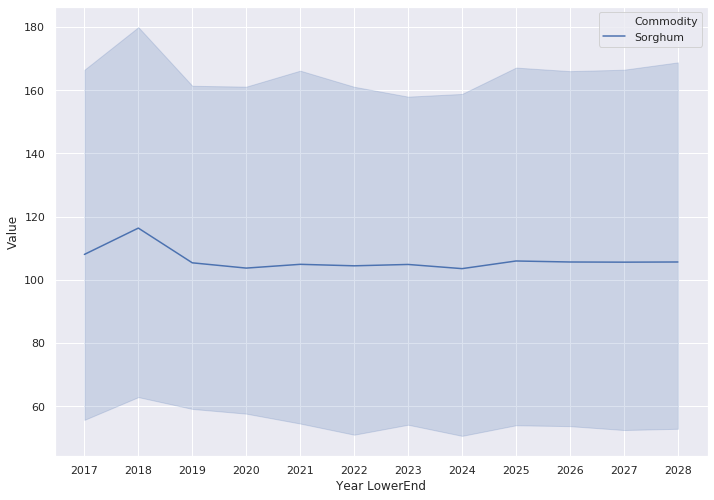

In [60]:
this_plot=sns.lineplot(df_sorghum['Year LowerEnd'], df_sorghum['Value'], hue=df_sorghum['Commodity'], n_boot=1000)

In [61]:
df_oats=df[df['Commodity']=='Oats']

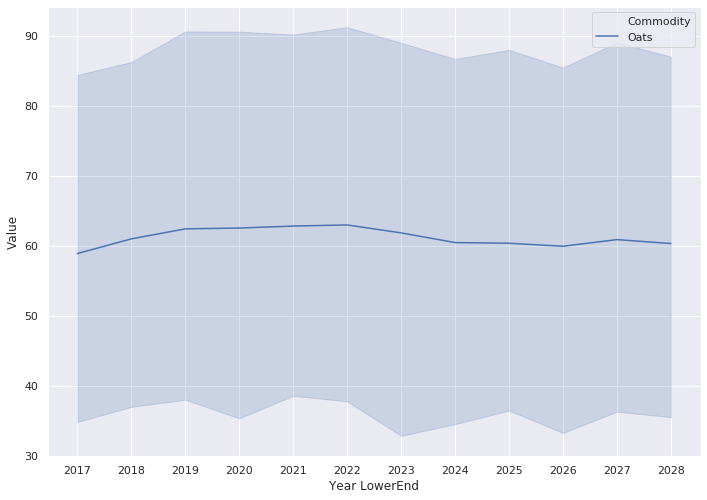

In [62]:
this_plot=sns.lineplot(df_oats['Year LowerEnd'], df_oats['Value'], hue=df_oats['Commodity'], n_boot=1000)

In [63]:
df_barley=df[df['Commodity']=='Barley']

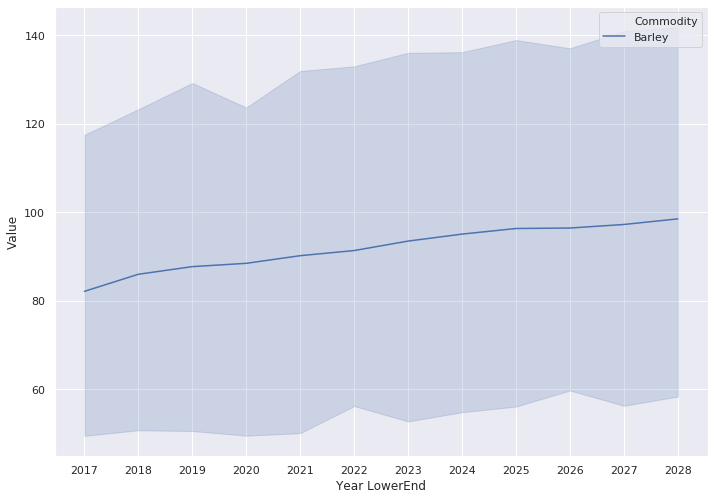

In [64]:
this_plot=sns.lineplot(df_barley['Year LowerEnd'], df_barley['Value'], hue=df_barley['Commodity'], n_boot=1000)

In [65]:
df_Corn=df[df['Commodity']=='Corn']

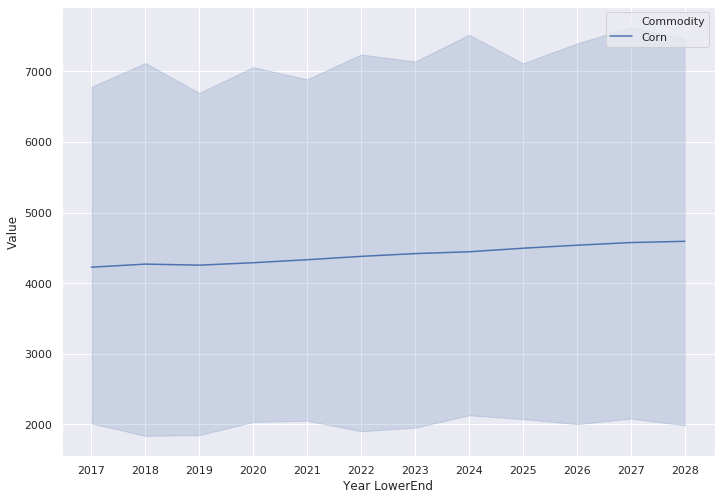

In [66]:
this_plot=sns.lineplot(df_Corn['Year LowerEnd'], df_Corn['Value'], hue=df_Corn['Commodity'], n_boot=1000)

##### Therefore, hypothesis is true as value of Corn and Barley will increase in coming years, whereas, sorghum and oats show a constant values over the years.

#### Valuable information drawn from hypothesis: United states will be producing crops constantly in the coming year with no decrease in their production.